In [1]:
#Installing dependencies
import pandas as pd
import seaborn as sns
import numpy as np




In [2]:
data = pd.read_csv('bitcoin_price_1week_Test - Test.csv')
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


In [3]:
data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
data.shape

(7, 7)

In [7]:
data.describe()

,Open,High,Low,Close
count,7.000000,7.000000,7.000000,7.000000
mean,2926.134286,3053.928571,2856.340000,2996.477143
std,222.327835,263.148120,224.210701,278.478301
min,2709.560000,2762.530000,2668.590000,2710.670000
25%,2767.030000,2856.320000,2685.375000,2761.495000
50%,2871.300000,2921.350000,2743.720000,2895.890000
75%,3055.205000,3291.650000,3015.215000,3233.425000
max,3257.610000,3397.680000,3180.890000,3378.940000


In [8]:
#Checking for null values
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [9]:
#Visualisation
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"


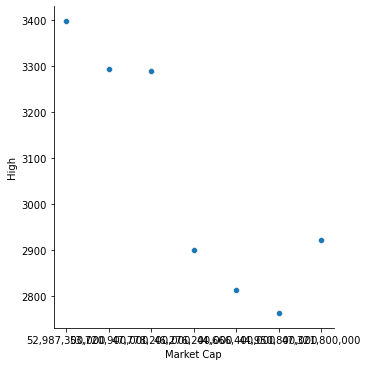

In [18]:
sns.relplot(x='Market Cap', y='High',data=data)

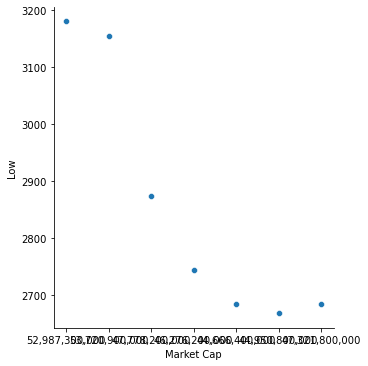

In [19]:
sns.relplot(x='Market Cap', y='Low',data=data)

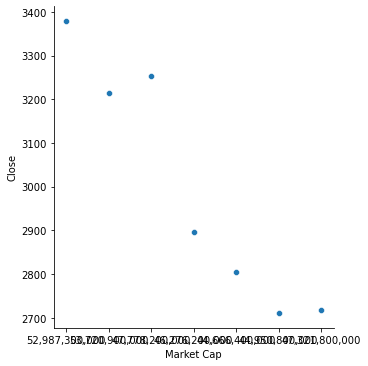

In [20]:
sns.relplot(x='Market Cap', y='Close',data=data)

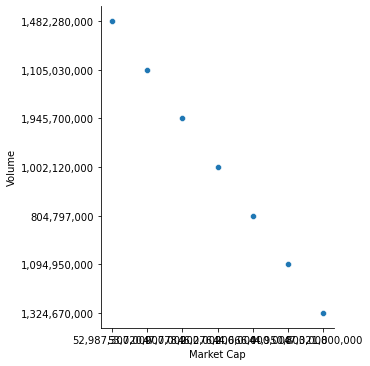

In [21]:
sns.relplot(x='Market Cap', y='Volume',data=data)

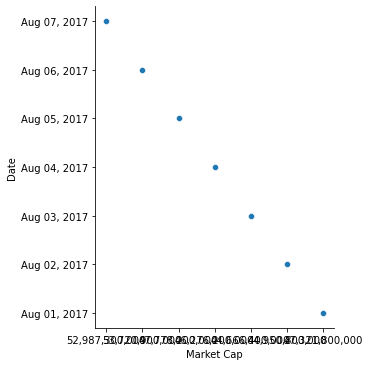

In [22]:
sns.relplot(x='Market Cap', y='Date',data=data)

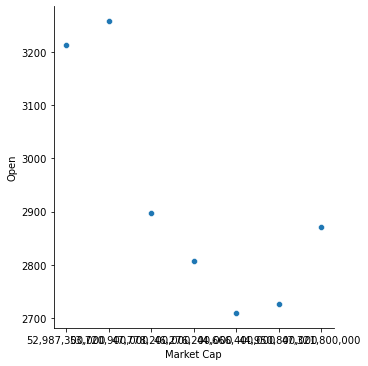

In [23]:
sns.relplot(x='Market Cap', y='Open',data=data)

In [48]:
#Modellig
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Converting values to float
data = data.replace('[^\d.]', '',regex=True).astype(float)
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,72017.0,3212.78,3397.68,3180.89,3378.94,1.482280e+09,5.298730e+10
1,62017.0,3257.61,3293.29,3155.60,3213.94,1.105030e+09,5.372090e+10
2,52017.0,2897.63,3290.01,2874.83,3252.91,1.945700e+09,4.777820e+10
3,42017.0,2806.93,2899.33,2743.72,2895.89,1.002120e+09,4.627620e+10
4,32017.0,2709.56,2813.31,2685.14,2804.73,8.047970e+08,4.466640e+10
5,22017.0,2727.13,2762.53,2668.59,2710.67,1.094950e+09,4.495080e+10
6,12017.0,2871.30,2921.35,2685.61,2718.26,1.324670e+09,4.732180e+10


In [49]:
train = data.drop(['Market Cap', 'Date', 'Volume'],axis=1)
test = data['Market Cap']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [51]:
regr = LinearRegression()

In [52]:
regr.fit(x_train, y_train)

LinearRegression()

In [53]:
pred = regr.predict(x_test)

In [54]:
pred

array([4.46292963e+10, 5.36843064e+10, 4.60447948e+10])

In [55]:
regr.score(x_test, y_test)

0.9987943307104924